<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span><ul class="toc-item"><li><span><a href="#Module-import" data-toc-modified-id="Module-import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Module import</a></span></li><li><span><a href="#File-Retrieval" data-toc-modified-id="File-Retrieval-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>File Retrieval</a></span></li><li><span><a href="#Data-Assign" data-toc-modified-id="Data-Assign-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Assign</a></span></li></ul></li><li><span><a href="#Sample-Plots" data-toc-modified-id="Sample-Plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sample Plots</a></span></li></ul></div>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
import math
from pylab import rcParams
from pylab import figure
from pandas import read_excel 
import ipywidgets as widgets
from itertools import cycle
import glob
import matplotlib.gridspec as gridspec

matplotlib.rcParams['font.family'] = 'cambria' 
matplotlib.rcParams['figure.figsize'] = 10, 6

%matplotlib inline

#define sub/superscripts
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
print("C2H5OH".translate(subscript))
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
print("PIr2".translate(superscript).replace('PI', 'π'))

C₂H₅OH
πr²


## Module import

This is for importing the MCF module. You can save the module wherever is most convenient, just change the path in sys.path.insert(0, 'path_here'). For both ease of use and to mitigate problems importing I import the mosule as: import Modularized_Cycling_Functions as MCF.

In [2]:
#using Modularized_Cycling_Functions

import sys
sys.path.insert(0, '/Applications/modules')
import Modularized_Cycling_Functions as MCF


## File Retrieval

Put the path to your arbin files here. This will create a list of files in the path you can call from later. This sorts the files in alphabetical order.

In [5]:
path = r'/Users/jessicagallawa/Library/CloudStorage/OneDrive-Colostate/Research/Battery Cycling/2022/SnSb - Compositional Samples/JRG_1_063022_*.xlsx'

file_list = MCF.files(path).retrieve()
print(file_list) #checks to see you have the correct list of files.

['/Users/jessicagallawa/Library/CloudStorage/OneDrive-Colostate/Research/Battery Cycling/2022/SnSb - Compositional Samples/JRG_1_063022_SnSbcomps_1Sn_1_0-5C_22_Channel_22.xlsx', '/Users/jessicagallawa/Library/CloudStorage/OneDrive-Colostate/Research/Battery Cycling/2022/SnSb - Compositional Samples/JRG_1_063022_SnSbcomps_2Sn3Sn_2_0-5C_29_Channel_29.xlsx', '/Users/jessicagallawa/Library/CloudStorage/OneDrive-Colostate/Research/Battery Cycling/2022/SnSb - Compositional Samples/JRG_1_063022_SnSbcomps_3snsb_4_0-5C_32_Channel_32.xlsx', '/Users/jessicagallawa/Library/CloudStorage/OneDrive-Colostate/Research/Battery Cycling/2022/SnSb - Compositional Samples/JRG_1_063022_SnSbcomps_4SnSb3_1_0-5C_31_Channel_31.xlsx', '/Users/jessicagallawa/Library/CloudStorage/OneDrive-Colostate/Research/Battery Cycling/2022/SnSb - Compositional Samples/JRG_1_063022_SnSbcomps_5Sb_0-5C_26_Channel_26.xlsx']


## Data Assign

This is for structuring your data, you are not actually importing data at this point. When you use the 'data' class from this module it autoassigns variables that are dependent on the parameters you have listed, and can use this to easily import data. For instance, if you want to use the mass of your active material from data1, you simply call data1.mass and this returns the number. This becomes especially helpful after you make a list for iteration as seen below. The associated variables are the file, arbin, mass and label. 

You can also use this class system with predefined functions. For instance, to call the capacity data for data1, use data1.data_cap()['charge'], data1.data_cap()['discharge'], or data1.data_cap()['cycle']. This links all the datasets to the data1 label. The assigned functions are: data_cycle() - pulls data for cycing and stores as a dataframe with variables ['time','step','cycle','voltage','charge','discharge']. data_cap() - pulls capacity data and stores as a dataframe with ['cycle','charge','discharge']. data_by_cycle() - groups data_cycle() by cycle and step, and cycle_nums() - returns number of cycles.

See module for explicit detailing of variable assignment and functions.

In [7]:
#datanum = MCF.data(file,'new' or 'old' arbin, mass (g), label)

data1=MCF.data(file_list[0],'new',0.0000402108,'Sn')
data2=MCF.data(file_list[1],'new',0.000138034,'3Sn:Sb')
data3=MCF.data(file_list[2],'new',0.00012736,'SnSb')
data4=MCF.data(file_list[3],'new',0.0000867083,'Sn:3Sb')
data5=MCF.data(file_list[4],'new',0.000074388,'Sb')

datas = [data1,data2,data3,data4,data5]

# Sample Plots

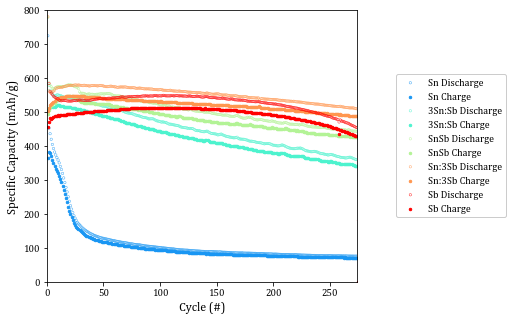

In [15]:
matplotlib.rcParams['figure.figsize'] = 7.5, 5

fig = plt.figure()
ax = fig.add_subplot(111)
#ax2 = ax.twinx()
s = 6
lw = 0.4

for index,dta in enumerate(datas):
    
    label = dta.label        #assigned label from the MCF.data() assignment
    
    ax.scatter(dta.data_cap()['cycle'],
               dta.data_cap()['discharge']/dta.mass*1000,
               marker='o',s=s,linewidths=lw,facecolors='none', 
               edgecolors=plt.cm.rainbow((index + 1)/len(datas)),
               label=label +' Discharge')
    ax.scatter(dta.data_cap()['cycle'],
               dta.data_cap()['charge']/dta.mass*1000,
               marker='o',
               color=plt.cm.rainbow((index + 1)/len(datas)),s=s,
               label=label +' Charge')
    #efficiency plot
    #ax2.scatter(dta.data_cap()['cycle'],(dta.data_cap()['charge']/dta.data_cap()['discharge'])*100,marker='x',s=s,linewidths=lw,color=plt.cm.rainbow((index + 1)/len(datas)), label=label +' Coulombic Efficiency')
    #blank plot for moving coulombic efficiency to the same legend
    #ax.scatter(np.nan,np.nan, marker='x',s=s,linewidths=lw,color=plt.cm.rainbow((index + 1)/len(datas)), label=label +' Coulombic Efficiency')  # Make an agent in ax
ax.set_xlabel('Cycle (#)',fontsize=12)
ax.set_ylabel('Specific Capacity (mAh/g)',fontsize=12)
ax.set_xlim(0,274)
ax.set_ylim(0,800)
ax.legend(bbox_to_anchor=(1.11,0.5), loc="center left",fontsize=10,fancybox=True, frameon=True,framealpha=1)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax2.set_ylabel('Coulombic Efficiency (%)',color='k',fontsize=12)   
#ax2.set_ylim(60,100)
plt.subplots_adjust(right=0.7)
#plt.tight_layout(rect=[0,0,0.75,1])
#plt.title('Cycle Lifetime of SnSb Anode in Na-ion Half Cell')
#plt.savefig('SnSb_Compstudies_Cycle_lifetime_large')

plt.show()

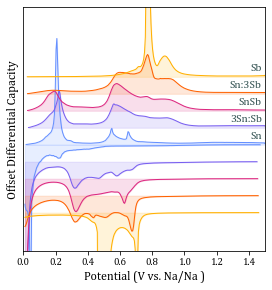

In [14]:
import matplotlib.gridspec as gridspec
matplotlib.rcParams['figure.figsize'] = 4,4
legLoc = 'upper right'
colormp = ['#648FFF','#785EF0','#DC267F','#FE6100','#FFB000']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colormp)
discharge_index = 3
charge_index = 4

for index,dta in enumerate(datas):
    #variables
    label = dta.label
    offsets = index*800
    c = colormp[index]
    mass = dta.mass
    #discharge
    discharge = dta.data_by_cycle().get_group((5,discharge_index))['discharge']/mass*1000
    voltage = dta.data_by_cycle().get_group((5,discharge_index))['voltage']
    dqdv = np.gradient(discharge)/np.gradient(voltage)
    dqdv = dqdv - offsets
    #offsets_lb = (offsets*(-1))+150
    plt.plot(voltage, dqdv, color=c,linewidth=1)
    plt.fill_between(voltage, dqdv,0 - offsets, color=c, alpha=0.15)
    #charge
    charge = dta.data_by_cycle().get_group((5,charge_index))['charge']/mass*1000
    voltage = dta.data_by_cycle().get_group((5,charge_index))['voltage']
    dqdv = np.gradient(charge)/np.gradient(voltage)
    dqdv = dqdv + offsets
    offsets_lb = offsets+40
    
    plt.plot(voltage, dqdv, color=c, label = label,linewidth=1)
    plt.fill_between(voltage, dqdv,0 + offsets, color=c, alpha=0.15)
    plt.annotate(label, (1.45,offsets_lb), xytext=(5, 5), textcoords="offset pixels",horizontalalignment='right',fontsize=11,color='darkslategray')
plt.xlim(-0.001,1.5)
plt.ylim(-5000,6500)
    #ax.legend(loc = legLoc, frameon = False, bbox_transform=plt.gcf().transFigure)
plt.yticks([])
plt.tight_layout(pad=1.4)
plt.xlabel('Potential (V vs. Na/Na$^+$)',fontsize=12)
plt.ylabel('Offset Differential Capacity',fontsize=12)
plt.show()